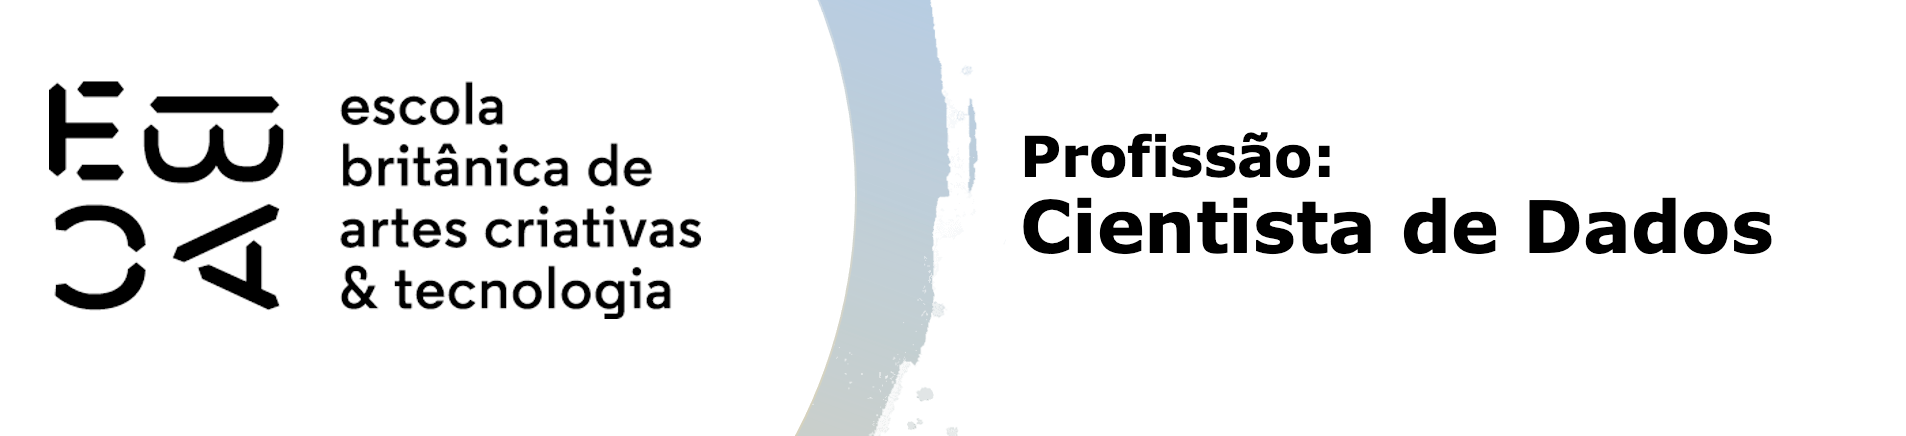

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 34** | Regressão III | Exercício I

**Aluno:** [Marcio da Silva](https://www.linkedin.com/in/marcio-d-silva/)<br>
**Data:** 19 de outubro de 2024.

---


# Regressão III - Tarefa

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from scipy.interpolate import interp1d
from sklearn.metrics import r2_score

In [4]:
#Lendo o arquivo CSV.
df = pd.read_csv(filepath_or_buffer='dados/previsao_de_renda_II.csv', index_col=0)

#Exibirndo informações sobre o DF.
df.info()

#Exibindo DF completo.
df

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,3.0,2930.40
2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,NaN,2.0,4084.37
2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,2.0,4339.66


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [5]:
#Avalia valores missing
missing_values = df.isnull().sum()
print("Valores missing por coluna:")
missing_values

Valores missing por coluna:


index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [6]:
# Preenchendo valores ausentes da variável 'tempo_emprego' com a média e criando uma nova variável
df['tempo_emprego_fillna_mean'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

# Imprimindo a quantidade de valores ausentes após o preenchimento
print(f"Nova variável 'tempo_emprego_fillna_mean' criada. Valores ausentes restantes:\n{df.isna().sum()}")

Nova variável 'tempo_emprego_fillna_mean' criada. Valores ausentes restantes:
index                             0
sexo                              0
posse_de_veiculo                  0
posse_de_imovel                   0
qtd_filhos                        0
tipo_renda                        0
educacao                          0
estado_civil                      0
tipo_residencia                   0
idade                             0
tempo_emprego                125760
qt_pessoas_residencia             0
renda                             0
tempo_emprego_fillna_mean         0
dtype: int64


In [7]:
# Adicionando uma nova coluna 'renda_log' com o logaritmo natural dos valores da coluna 'renda'
# Verificando se há valores negativos ou zero antes de aplicar o logaritmo
if (df['renda'] <= 0).any():
    raise ValueError("A coluna 'renda' contém valores não positivos. Não é possível calcular o logaritmo.")

df['renda_log'] = np.log(df['renda'])

# Reordenando as colunas do DataFrame de forma clara
colunas_reordenadas = [
    'index', 
    'sexo', 
    'posse_de_veiculo', 
    'posse_de_imovel', 
    'qtd_filhos', 
    'tipo_renda', 
    'educacao', 
    'estado_civil', 
    'tipo_residencia', 
    'idade', 
    'tempo_emprego', 
    'tempo_emprego_fillna_mean', 
    'qt_pessoas_residencia', 
    'renda', 
    'renda_log'
]

df = df[colunas_reordenadas]

df

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,tempo_emprego_fillna_mean,qt_pessoas_residencia,renda,renda_log
data_ref,,,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,16.717808,2.0,11138.14,9.318131
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,9.600000,2.0,2424.81,7.793508
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,8.208219,2.0,13749.66,9.528769
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,1.301370,4.0,2361.84,7.767196
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,1.254795,4.0,790.78,6.673020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,8.665753,3.0,2930.40,7.982894
2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,NaN,7.746165,2.0,4084.37,8.314923
2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,10.969863,2.0,4339.66,8.375551


---

### Base de testes

Separe os três últimos meses como base holdout (base de teste).

In [8]:
# Convertendo o índice do DataFrame para o tipo datetime
df.index = pd.to_datetime(df.index)

# Obtendo meses únicos na base de dados
meses_presentes = df.index.unique().strftime('%b%y').tolist()

# Obtendo os últimos três meses na base de dados
ultimos_tres_meses = df.index[df.index > (df.index.max() - pd.DateOffset(months=3))].unique().strftime('%b%y').tolist()

# Imprimindo os resultados
print(f'Meses presentes na base:\n{meses_presentes}\n')
print(f'Três últimos meses na base:\n{ultimos_tres_meses}\n')

Meses presentes na base:
['Jan15', 'Feb15', 'Mar15', 'Apr15', 'May15', 'Jun15', 'Jul15', 'Aug15', 'Sep15', 'Oct15', 'Nov15', 'Dec15', 'Jan16', 'Feb16', 'Mar16']

Três últimos meses na base:
['Jan16', 'Feb16', 'Mar16']



In [9]:
# Criando um DataFrame de holdout (df_holdout) com dados dos últimos três meses
limite_data = df.index.max() - pd.DateOffset(months=3)
df_holdout = df[df.index > limite_data].copy()

# Obtendo os meses presentes na base de holdout
meses_holdout = df_holdout.index.unique().strftime('%b%y').tolist()

# Imprimindo os meses da base de holdout
print(f'Base holdout (df_holdout):\n{meses_holdout}\n')

# Exibindo o DataFrame de holdout
df_holdout

Base holdout (df_holdout):
['Jan16', 'Feb16', 'Mar16']



,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,tempo_emprego_fillna_mean,qt_pessoas_residencia,renda,renda_log
data_ref,,,,,,,,,,,,,,,
2016-01-01,12946,F,N,S,0,Pensionista,Médio,Casado,Casa,61,NaN,7.746165,2.0,2137.61,7.667444
2016-01-01,8872,F,N,S,2,Servidor público,Superior completo,Casado,Casa,27,9.301370,9.301370,4.0,13884.35,9.538518
2016-01-01,16279,F,S,S,3,Assalariado,Médio,Casado,Casa,38,10.967123,10.967123,5.0,11042.47,9.309504
2016-01-01,8158,M,S,S,3,Servidor público,Médio,Casado,Casa,35,5.553425,5.553425,5.0,1333.82,7.195802
2016-01-01,9356,F,S,N,0,Assalariado,Médio,Viúvo,Casa,63,9.265753,9.265753,1.0,17633.03,9.777529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,8.665753,3.0,2930.40,7.982894
2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,NaN,7.746165,2.0,4084.37,8.314923
2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,10.969863,2.0,4339.66,8.375551


In [10]:
# Criando um DataFrame de treino (df_train) excluindo os últimos três meses utilizados para holdout
df_train = df[~df.index.isin(df_holdout.index)].copy()

# Obtendo os meses presentes na base de treino
meses_treino = df_train.index.unique().strftime('%b%y').tolist()

# Imprimindo os meses da base de treino
print(f'Base de treino (df_train):\n{meses_treino}\n')

# Exibindo o DataFrame de treino
df_train

Base de treino (df_train):
['Jan15', 'Feb15', 'Mar15', 'Apr15', 'May15', 'Jun15', 'Jul15', 'Aug15', 'Sep15', 'Oct15', 'Nov15', 'Dec15']



,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,tempo_emprego_fillna_mean,qt_pessoas_residencia,renda,renda_log
data_ref,,,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,16.717808,2.0,11138.14,9.318131
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,9.600000,2.0,2424.81,7.793508
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,8.208219,2.0,13749.66,9.528769
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,1.301370,4.0,2361.84,7.767196
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,1.254795,4.0,790.78,6.673020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,4.441096,2.0,1893.35,7.546103
2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.345205,2.0,3080.48,8.032841
2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,0.736986,2.0,5131.20,8.543095


---

### Primeiro modelo

Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [11]:
# Ajustando um modelo de regressão linear simples
modelo1 = smf.ols(formula='renda_log ~ tempo_emprego_fillna_mean', data=df_train).fit()

# Imprimindo o R-quadrado ajustado do modelo
r_quadrado_ajustado = modelo1.rsquared_adj
print(f'R-quadrado ajustado: {r_quadrado_ajustado:.2%}')

# Exibindo um resumo do modelo
modelo1.summary()

R-quadrado ajustado: 41.74%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 4.298e+05
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:21:07   Log-Likelihood:            -8.0817e+05
No. Observations:              600000   AIC:                         1.616e+06
Df Residuals:                  599998   BIC:                         1.616e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     8.2780      0.002   4262.716      0.000       8.274       8.282
tempo_emprego_fillna_mean     0.1292      0.000    655.629      0.000       0.129       0.130
==============================================================================
Omnibus:                      798.953   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.227
Skew:                          -0.046   Prob(JB):                    1.80e-156
Kurtosis:                       2.857   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [12]:
# Definindo o número inicial de quantis desejados
n_quantis = 20
quantis = n_quantis

# Ajustando o número de quantis até que o número de intervalos únicos seja satisfatório
while pd.qcut(x=df_train['tempo_emprego'], q=quantis, duplicates='drop').nunique() < n_quantis:
    quantis += 1

# Criando a nova coluna 'cat_tempo_emprego' com os intervalos de quantis
df_train['cat_tempo_emprego'] = pd.qcut(x=df_train['tempo_emprego'], q=quantis, duplicates='drop', precision=0)

# Calculando estatísticas resumidas para cada grupo de 'cat_tempo_emprego'
df_cat = (df_train
          .groupby('cat_tempo_emprego')
          .agg({'cat_tempo_emprego': [('Quantidade de observações', 'count')], 
                'renda_log': [('Média do log-renda', 'mean')], 
                'tempo_emprego': [('Média do tempo de emprego', 'mean')]})
          .droplevel(level=0, axis=1))

# Exibindo as estatísticas resumidas
df_cat

/var/folders/30/ccp86mqj2q1cbkdw53t09hmc0000gn/T/ipykernel_3846/3893527679.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('cat_tempo_emprego')


,Quantidade de observações,Média do log-renda,Média do tempo de emprego
cat_tempo_emprego,,,
"(0.0, 0.7]",25154,8.370907,0.464057
"(0.7, 1.2]",25038,8.417388,0.971487
"(1.2, 1.8]",24888,8.531471,1.502835
"(1.8, 2.4]",24789,8.561743,2.055728
"(2.4, 3.0]",25155,8.675957,2.715994
"(3.0, 3.6]",24822,8.754188,3.355636
"(3.6, 4.2]",24931,8.849051,3.924755
"(4.2, 4.7]",25158,8.912516,4.449669
"(4.7, 5.4]",24755,8.949442,5.004796


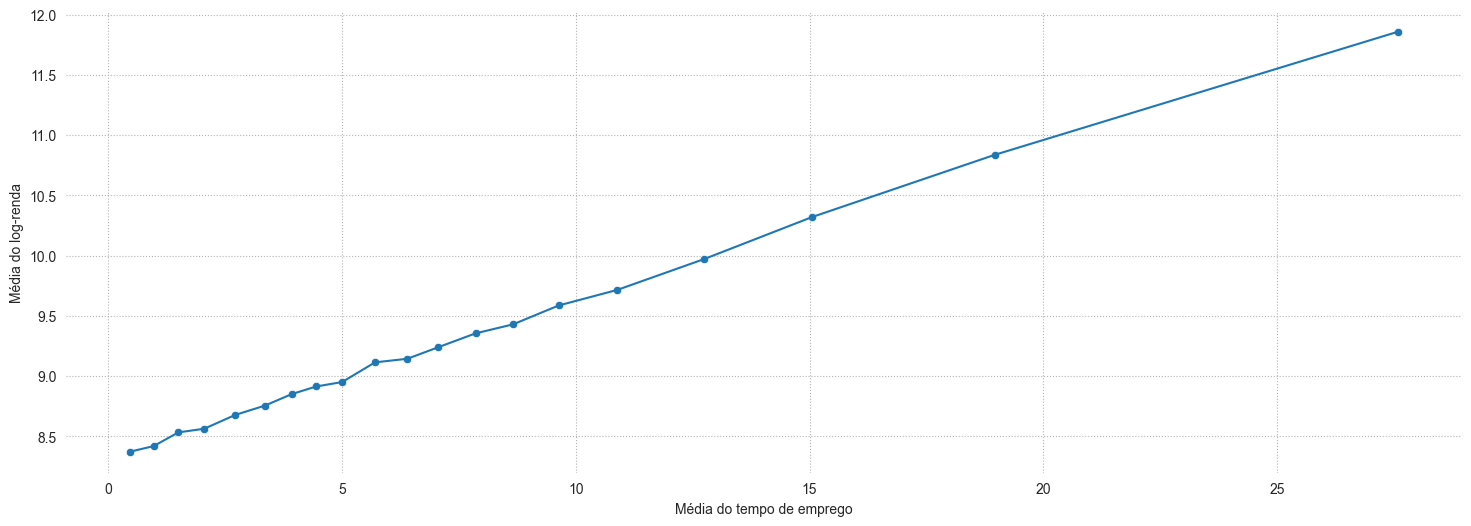

In [13]:
# Configurando o estilo do gráfico
sns.set_style("whitegrid", {"grid.color": '.7', "grid.linestyle": ':'})

# Criando a figura e o gráfico de dispersão com linha de tendência
plt.figure(figsize=(18, 6))
sns.scatterplot(x='Média do tempo de emprego', y='Média do log-renda', data=df_cat)
sns.lineplot(x='Média do tempo de emprego', y='Média do log-renda', data=df_cat)

# Removendo as linhas de grade à esquerda e na parte inferior
sns.despine(left=True, bottom=True)

# Exibindo o gráfico
plt.show()

**Comentário:** A análise do gráfico revela uma tendência linear consistente, o que inicialmente sugere a aplicação de uma regressão linear simples. No entanto, é importante considerar a transformação logarítmica na variável dependente. Se essa transformação fosse aplicada desde o início, ficaria evidente o crescimento exponencial, refletido no espaçamento crescente entre os valores à medida que aumentam. Assim, tanto a categorização quanto a transformação logarítmica, ou até uma regressão segmentada, podem gerar resultados satisfatórios. Contudo, o método Lowess se destaca como uma opção preferível, pois ajusta-se ao formato exponencial, suavizando a curva conforme necessário.

---

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [14]:
# Criando uma nova coluna 'cat_renda' com categorias baseadas nos quantis
df_train['cat_renda'], retbins = pd.qcut(df_train['renda'], q=20, retbins=True, precision=0)

# Imprimindo o número de categorias únicas criadas
print(f'Quantidade de categorias para "cat_renda": {df_train["cat_renda"].nunique()}')

# Exibindo o DataFrame de treino atualizado
df_train

Quantidade de categorias para "cat_renda": 20


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,tempo_emprego_fillna_mean,qt_pessoas_residencia,renda,renda_log,cat_tempo_emprego,cat_renda
data_ref,,,,,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,16.717808,2.0,11138.14,9.318131,"(16.5, 21.5]","(9966.0, 11497.0]"
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,9.600000,2.0,2424.81,7.793508,"(9.1, 10.2]","(1689.0, 2449.0]"
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,8.208219,2.0,13749.66,9.528769,"(7.5, 8.2]","(13339.0, 15536.0]"
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,1.301370,4.0,2361.84,7.767196,"(1.2, 1.8]","(1689.0, 2449.0]"
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,1.254795,4.0,790.78,6.673020,"(1.2, 1.8]","(140.0, 1689.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,4.441096,2.0,1893.35,7.546103,"(4.2, 4.7]","(1689.0, 2449.0]"
2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.345205,2.0,3080.48,8.032841,"(1.8, 2.4]","(2449.0, 3163.0]"
2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,0.736986,2.0,5131.20,8.543095,"(0.7, 1.2]","(4671.0, 5519.0]"


In [15]:
# Criando um novo DataFrame df_cat2 com estatísticas resumidas para cada categoria da variável 'cat_renda'
df_cat2 = (df_train
           .groupby('cat_renda')
           .agg({'cat_renda':[('Quantidade de observações', 'count')], 
                 'tempo_emprego': [('Média do tempo de emprego', 'mean')], 
                 'renda_log': [('Média do renda_log', 'mean')]})
           .droplevel(level=0, axis=1))

# Exibindo o DataFrame df_cat2
df_cat2

/var/folders/30/ccp86mqj2q1cbkdw53t09hmc0000gn/T/ipykernel_3846/622893926.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('cat_renda')


,Quantidade de observações,Média do tempo de emprego,Média do renda_log
cat_renda,,,
"(140.0, 1689.0]",30000,2.828320,7.010163
"(1689.0, 2449.0]",30003,3.468372,7.632577
"(2449.0, 3163.0]",29998,3.931181,7.936228
"(3163.0, 3891.0]",30004,4.253151,8.165258
"(3891.0, 4671.0]",30002,4.589883,8.359802
"(4671.0, 5519.0]",29998,4.807133,8.533222
"(5519.0, 6458.0]",29998,5.104199,8.695236
"(6458.0, 7488.0]",29999,5.371974,8.846803
"(7488.0, 8648.0]",29998,5.665605,8.992746


In [16]:
# Preenchendo os valores ausentes da coluna 'tempo_emprego' com a média correspondente da categoria 'cat_renda'
df_train['tempo_emprego_fillna_2'] = (df_train['tempo_emprego']
                                      .fillna(value=df_train.merge(right=df_cat2, 
                                                                   how='left', 
                                                                   left_on='cat_renda', 
                                                                   right_index=True)['Média do tempo de emprego']))
# Exibindo o DataFrame de treino atualizado
df_train

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,tempo_emprego_fillna_mean,qt_pessoas_residencia,renda,renda_log,cat_tempo_emprego,cat_renda,tempo_emprego_fillna_2
data_ref,,,,,,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,16.717808,2.0,11138.14,9.318131,"(16.5, 21.5]","(9966.0, 11497.0]",16.717808
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,9.600000,2.0,2424.81,7.793508,"(9.1, 10.2]","(1689.0, 2449.0]",9.600000
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,8.208219,2.0,13749.66,9.528769,"(7.5, 8.2]","(13339.0, 15536.0]",8.208219
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,1.301370,4.0,2361.84,7.767196,"(1.2, 1.8]","(1689.0, 2449.0]",1.301370
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,1.254795,4.0,790.78,6.673020,"(1.2, 1.8]","(140.0, 1689.0]",1.254795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,4.441096,2.0,1893.35,7.546103,"(4.2, 4.7]","(1689.0, 2449.0]",4.441096
2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.345205,2.0,3080.48,8.032841,"(1.8, 2.4]","(2449.0, 3163.0]",2.345205
2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,0.736986,2.0,5131.20,8.543095,"(0.7, 1.2]","(4671.0, 5519.0]",0.736986


In [17]:
# Ajustando um modelo de regressão linear
modelo2 = smf.ols(formula='renda_log ~ tempo_emprego_fillna_2', data=df_train).fit()

# Imprimindo os R-quadrados ajustados dos modelos
for i, modelo in enumerate([modelo1, modelo2], start=1):
    print(f'R-quadrado ajustado (modelo{i}): {modelo.rsquared_adj:.2%}')

# Exibindo um resumo do segundo modelo
modelo2.summary()

R-quadrado ajustado (modelo1): 41.74%
R-quadrado ajustado (modelo2): 47.57%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                 5.445e+05
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:21:08   Log-Likelihood:            -7.7650e+05
No. Observations:              600000   AIC:                         1.553e+06
Df Residuals:                  599998   BIC:                         1.553e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.2620      0.002   4621.417      0.000       8.258       8.265
tempo_emprego_fillna_2     0.1355      0.000    737.887      0.000       0.135       0.136
==============================================================================
Omnibus:                      237.546   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.016
Skew:                          -0.048   Prob(JB):                     2.07e-52
Kurtosis:                       3.022   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Ajustando um terceiro modelo de regressão linear
modelo3 = smf.ols(formula='Q("Média do renda_log") ~ Q("Média do tempo de emprego")', data=df_cat2).fit()

# Imprimindo os R-quadrados ajustados dos três modelos
for i, modelo in enumerate([modelo1, modelo2, modelo3], start=1):
    print(f'R-quadrado ajustado (modelo{i}): {modelo.rsquared_adj:.2%}')

# Exibindo um resumo do terceiro modelo
modelo3.summary()

R-quadrado ajustado (modelo1): 41.74%
R-quadrado ajustado (modelo2): 47.57%
R-quadrado ajustado (modelo3): 84.98%


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Q("Média do renda_log")   R-squared:                       0.858
Model:                                 OLS   Adj. R-squared:                  0.850
Method:                      Least Squares   F-statistic:                     108.5
Date:                     Sat, 19 Oct 2024   Prob (F-statistic):           4.76e-09
Time:                             23:21:08   Log-Likelihood:                -12.608
No. Observations:                       20   AIC:                             29.22
Df Residuals:                           18   BIC:                             31.21
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.4269      0.208     35.782      0.000       6.991       7.863
Q("Média do tempo de emprego")     0.2468      0.024     10.414      0.000       0.197       0.297
==============================================================================
Omnibus:                        4.815   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.484
Skew:                          -1.022   Prob(JB):                        0.175
Kurtosis:                       3.006   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Combinando os resultados do modelo de regressão linear com as estatísticas resumidas do DataFrame df_cat2
df_modelo3 = (df_cat2
              .merge(right=modelo3.get_prediction().summary_frame(), 
                     on='cat_renda')
              .rename(columns={'Quantidade de observações':'qtd', 
                               'Média do tempo de emprego':'tempo_emprego', 
                               'Média do renda_log':'renda_log'}))
# Exibindo o DataFrame df_modelo3
df_modelo3

,qtd,tempo_emprego,renda_log,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
cat_renda,,,,,,,,,
"(140.0, 1689.0]",30000,2.828320,7.010163,8.124859,0.154094,7.801120,8.448599,7.067555,9.182163
"(1689.0, 2449.0]",30003,3.468372,7.632577,8.282803,0.143580,7.981152,8.584454,7.232052,9.333553
"(2449.0, 3163.0]",29998,3.931181,7.936228,8.397009,0.136524,8.110183,8.683835,7.350418,9.443600
"(3163.0, 3891.0]",30004,4.253151,8.165258,8.476461,0.131931,8.199285,8.753636,7.432473,9.520448
"(3891.0, 4671.0]",30002,4.589883,8.359802,8.559555,0.127438,8.291817,8.827293,7.518033,9.601076
"(4671.0, 5519.0]",29998,4.807133,8.533222,8.613165,0.124725,8.351127,8.875203,7.573094,9.653236
"(5519.0, 6458.0]",29998,5.104199,8.695236,8.686471,0.121271,8.431690,8.941252,7.648205,9.724738
"(6458.0, 7488.0]",29999,5.371974,8.846803,8.752549,0.118430,8.503737,9.001362,7.715731,9.789367
"(7488.0, 8648.0]",29998,5.665605,8.992746,8.825008,0.115635,8.582067,9.067948,7.789583,9.860432


In [20]:
def plotar_resultados_regressao(data: pd.DataFrame) -> None:
    """
    Plota os dados observados, a média prevista e os intervalos de confiança de um modelo de regressão.

    Parâmetros:
        data (pd.DataFrame): DataFrame contendo os resultados da regressão.

    Retorna:
        None
    """
    plt.figure(figsize=(18, 6))
    sns.set_theme(style='white')

    # Plotando os dados observados e a linha conectando-os
    plt.plot(data['tempo_emprego'], data['renda_log'], 'bo', alpha=.9, label='Dados observados')
    plt.plot(data['tempo_emprego'], data['renda_log'], '-', alpha=.3)

    # Plotando a média prevista e intervalos de confiança
    plt.plot(data['tempo_emprego'], data['mean'], 'g-.', label='Média prevista')
    plt.fill_between(data['tempo_emprego'], data['mean_ci_lower'], data['mean_ci_upper'], color='orange', alpha=0.3, label='Intervalo de confiança da média')
    plt.plot(data['tempo_emprego'], data['obs_ci_lower'], 'r--', label='Intervalo de confiança para a variável de resposta')
    plt.plot(data['tempo_emprego'], data['obs_ci_upper'], 'r--')

    # Adicionando legenda e exibindo o gráfico
    plt.legend(loc='best')
    plt.show()

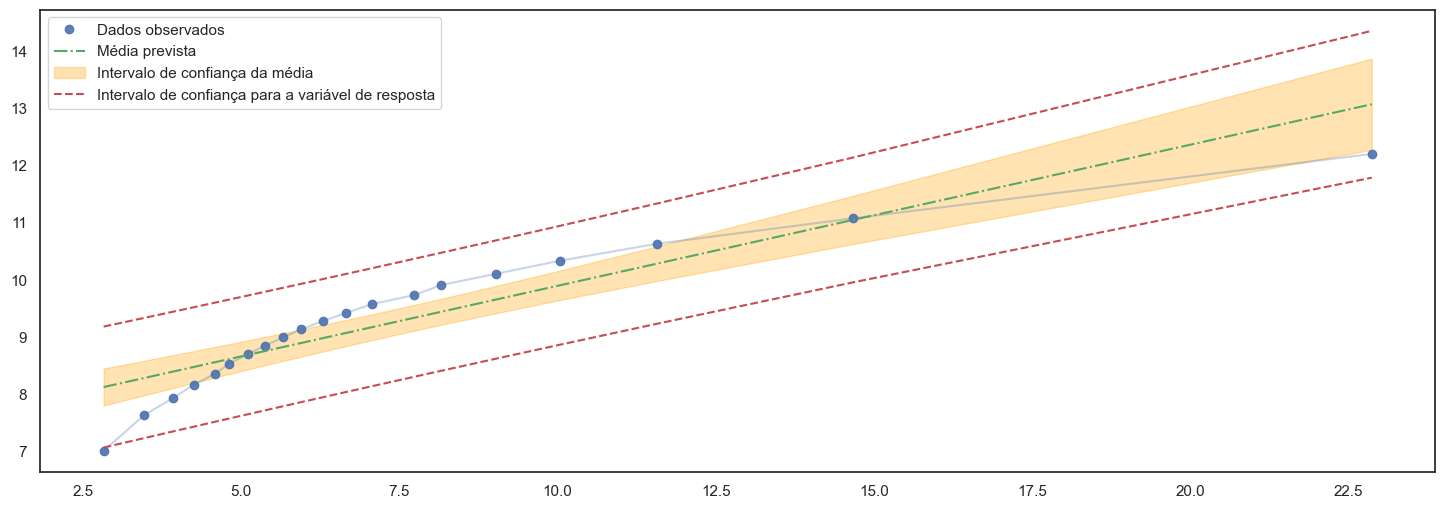

In [21]:
# Exibindo o gráfico com os resultados do modelo de regressão
plotar_resultados_regressao(data=df_modelo3)

---

In [22]:
# Criando um novo DataFrame df_train2 com colunas relevantes e renomeando-as
df_train2 = df_cat2.iloc[:, 1:].reset_index(drop=True).rename(columns={
    'Média do tempo de emprego': 'tempo_emprego', 
    'Média do renda_log': 'renda_log'
})

# Exibindo o DataFrame df_train2
df_train2

,tempo_emprego,renda_log
0,2.828320,7.010163
1,3.468372,7.632577
2,3.931181,7.936228
3,4.253151,8.165258
4,4.589883,8.359802
5,4.807133,8.533222
6,5.104199,8.695236
7,5.371974,8.846803
8,5.665605,8.992746
9,5.951053,9.135799


---

### Categorização

In [23]:
# Dividindo 'tempo_emprego' em 10 categorias usando quantis
df_train2['tempo_emprego_cat'], q = pd.qcut(df_train2['tempo_emprego'], q=10, retbins=True, duplicates='drop')

# Exibindo os pontos de corte
q

array([ 2.82831955,  3.88489973,  4.52253642,  5.01507938,  5.54815254,
        6.1206601 ,  6.82530007,  7.86743048,  9.2254007 , 11.88062575,
       22.86804915])

In [24]:
# Definindo os pontos de corte para 'tempo_emprego'
q = [-np.inf, 3.88489973, 4.52253642, 5.54815254, 6.82530007, 9.2254007, np.inf]

# Criando a coluna 'tempo_emprego_cat' com os intervalos definidos
df_train2['tempo_emprego_cat'] = pd.cut(df_train2['tempo_emprego'], bins=q)

# Calculando a média e o erro padrão da 'renda_log' para cada intervalo
df_train3 = df_train2.groupby('tempo_emprego_cat')['renda_log'].agg(
    y_mean='mean', 
    std_error='sem'
).reset_index()

# Calculando os limites do intervalo de confiança de 95%
df_train3['y_max'] = df_train3['y_mean'] + df_train3['std_error'] * 2
df_train3['y_min'] = df_train3['y_mean'] - df_train3['std_error'] * 2

# Combinando os resultados com o DataFrame df_train2
df_train3 = df_train2.merge(df_train3, on='tempo_emprego_cat', how='left')

# Exibindo o DataFrame df_train3
df_train3

/var/folders/30/ccp86mqj2q1cbkdw53t09hmc0000gn/T/ipykernel_3846/3653436454.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train3 = df_train2.groupby('tempo_emprego_cat')['renda_log'].agg(


,tempo_emprego,renda_log,tempo_emprego_cat,y_mean,std_error,y_max,y_min
0,2.828320,7.010163,"(-inf, 3.885]",7.321370,0.311207,7.943784,6.698956
1,3.468372,7.632577,"(-inf, 3.885]",7.321370,0.311207,7.943784,6.698956
2,3.931181,7.936228,"(3.885, 4.523]",8.050743,0.114515,8.279773,7.821713
3,4.253151,8.165258,"(3.885, 4.523]",8.050743,0.114515,8.279773,7.821713
4,4.589883,8.359802,"(4.523, 5.548]",8.608765,0.104813,8.818391,8.399140
5,4.807133,8.533222,"(4.523, 5.548]",8.608765,0.104813,8.818391,8.399140
6,5.104199,8.695236,"(4.523, 5.548]",8.608765,0.104813,8.818391,8.399140
7,5.371974,8.846803,"(4.523, 5.548]",8.608765,0.104813,8.818391,8.399140
8,5.665605,8.992746,"(5.548, 6.825]",9.207335,0.092525,9.392385,9.022285
9,5.951053,9.135799,"(5.548, 6.825]",9.207335,0.092525,9.392385,9.022285


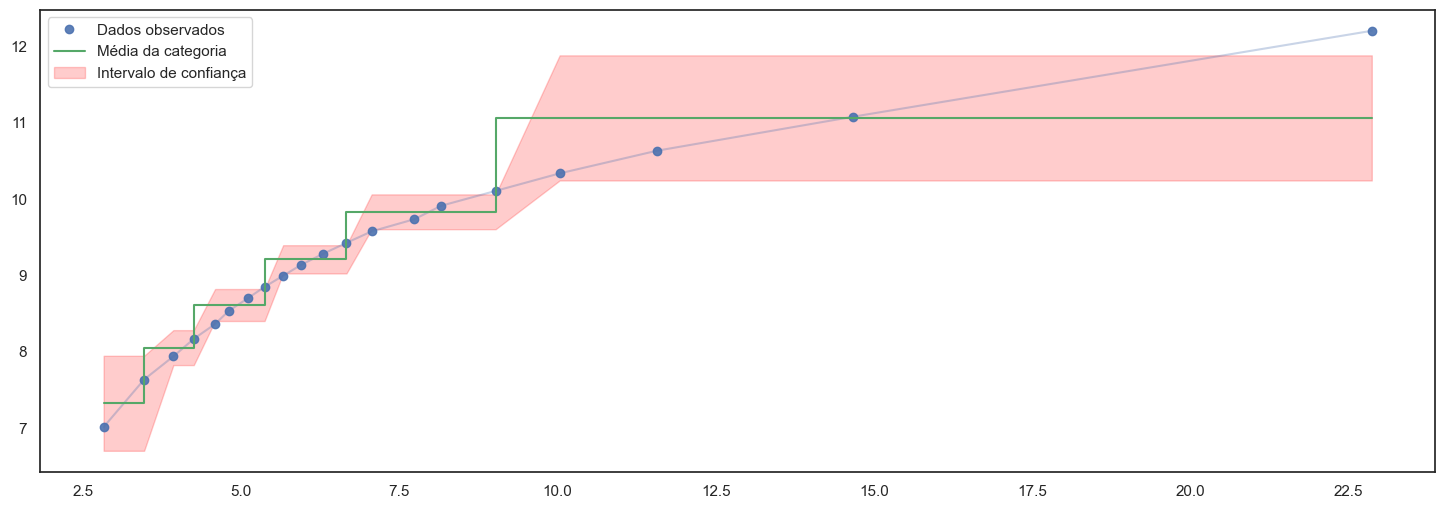

In [25]:
# Criando um gráfico para visualizar os dados e a média da categoria
plt.figure(figsize=(18, 6))

# Plotando os dados observados e a linha conectando-os
plt.plot(df_train3.tempo_emprego, df_train3.renda_log, 'bo', alpha=.9, label='Dados observados')
plt.plot(df_train3.tempo_emprego, df_train3.renda_log, '-', alpha=.3)

# Plotando a média da categoria e o intervalo de confiança
plt.step(df_train3.tempo_emprego, df_train3.y_mean, 'g-', label='Média da categoria')
plt.fill_between(df_train3.tempo_emprego, df_train3.y_min, df_train3.y_max, color='red', alpha=.2, label='Intervalo de confiança')

# Adicionando legenda e exibindo o gráfico
plt.legend(loc='best')
plt.show()

In [26]:
# Ajustando um modelo de regressão linear com 'tempo_emprego_cat' como preditor
modelo4 = smf.ols(formula='renda_log ~ tempo_emprego_cat', data=df_train3).fit()

# Imprimindo os R-quadrados ajustados dos modelos
for i, modelo in enumerate([modelo1, modelo2, modelo3, modelo4], start=1):
    print(f'R-quadrado ajustado (modelo{i}): {modelo.rsquared_adj:.2%}')

# Exibindo um resumo do quarto modelo
modelo4.summary()

R-quadrado ajustado (modelo1): 41.74%
R-quadrado ajustado (modelo2): 47.57%
R-quadrado ajustado (modelo3): 84.98%
R-quadrado ajustado (modelo4): 87.72%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     28.15
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           7.81e-07
Time:                        23:21:10   Log-Likelihood:                -8.0765
No. Observations:                  20   AIC:                             28.15
Df Residuals:                      14   BIC:                             34.13
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       7.3214      0.306     23.906      0.000       6.665       7.978
tempo_emprego_cat[T.Interval(3.885, 4.523, closed='right')]     0.7294      0.433      1.684      0.114      -0.200       1.658
tempo_emprego_cat[T.Interval(4.523, 5.548, closed='right')]     1.2874      0.375      3.432      0.004       0.483       2.092
tempo_emprego_cat[T.Interval(5.548, 6.825, closed='right')]     1.8860      0.375      5.028      0.000       1.082       2.690
tempo_emprego_cat[T.Interval(6.825, 9.225, closed='right')]     2.5087      0.375      6.688      0.000       1.704       3.313
tempo_emprego_cat[T.Interval(9.225, inf, closed='right')]       3.7384      0.375      9.967      0.000       2.934       4.543
==============================================================================
Omnibus:                       11.637   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.097
Skew:                           1.078   Prob(JB):                      0.00389
Kurtosis:                       5.945   Cond. No.                         8.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

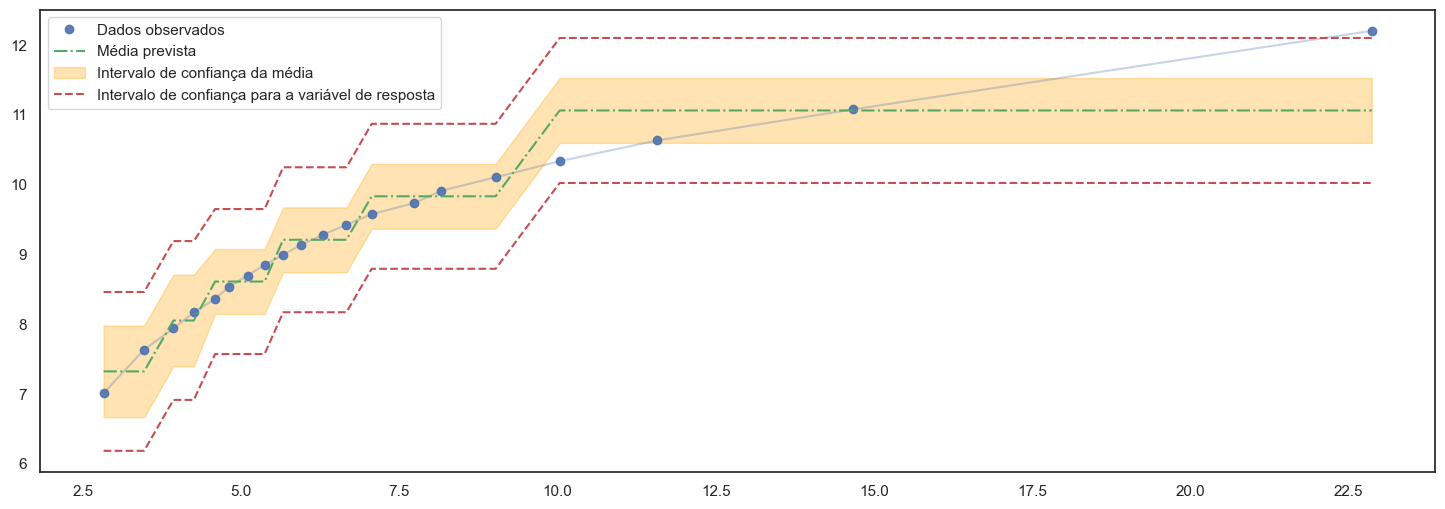

In [27]:
# Concatenando os resultados do modelo com os dados do DataFrame
df_modelo4 = pd.concat([df_train3, modelo4.get_prediction().summary_frame()], axis=1)

# Exibindo o gráfico com os resultados do modelo de regressão linear
plotar_resultados_regressao(df_modelo4)

---

### Transformação sobre X


In [28]:
# Ajustando um modelo de regressão linear usando o logaritmo de 'tempo_emprego'
modelo5 = smf.ols(formula='renda_log ~ I(np.log(tempo_emprego))', data=df_train2).fit()

# Imprimindo os R-quadrados ajustados dos modelos
for i, modelo in enumerate([modelo1, modelo2, modelo3, modelo4, modelo5], start=1):
    print(f'R-quadrado ajustado (modelo{i}): {modelo.rsquared_adj:.2%}')

# Exibindo um resumo do quinto modelo
modelo5.summary()

R-quadrado ajustado (modelo1): 41.74%
R-quadrado ajustado (modelo2): 47.57%
R-quadrado ajustado (modelo3): 84.98%
R-quadrado ajustado (modelo4): 87.72%
R-quadrado ajustado (modelo5): 99.34%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2880.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           2.56e-21
Time:                        23:21:10   Log-Likelihood:                 18.712
No. Observations:                  20   AIC:                            -33.42
Df Residuals:                      18   BIC:                            -31.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.6737      0.089     52.709      0.000       4.487       4.860
I(np.log(tempo_emprego))     2.4474      0.046     53.669      0.000       2.352       2.543
==============================================================================
Omnibus:                        2.175   Durbin-Watson:                   0.300
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.815
Skew:                          -0.662   Prob(JB):                        0.404
Kurtosis:                       2.347   Cond. No.                         9.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Combinando os resultados do modelo com as duas primeiras colunas do DataFrame
df_modelo5 = pd.concat([df_train2.iloc[:, :2], modelo5.get_prediction().summary_frame().reset_index(drop=True)], axis=1)

# Exibindo o DataFrame df_modelo5
df_modelo5

,tempo_emprego,renda_log,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.828320,7.010163,7.218149,0.044434,7.124797,7.311501,6.988113,7.448185
1,3.468372,7.632577,7.717420,0.036697,7.640323,7.794518,7.493487,7.941353
2,3.931181,7.936228,8.023966,0.032358,7.955984,8.091947,7.803005,8.244926
3,4.253151,8.165258,8.216624,0.029868,8.153873,8.279376,7.997217,8.436032
4,4.589883,8.359802,8.403101,0.027690,8.344927,8.461274,8.184958,8.621243
5,4.807133,8.533222,8.516283,0.026502,8.460604,8.571963,8.298793,8.733774
6,5.104199,8.695236,8.663035,0.025143,8.610211,8.715859,8.446257,8.879812
7,5.371974,8.846803,8.788174,0.024169,8.737396,8.838952,8.571886,9.004462
8,5.665605,8.992746,8.918419,0.023360,8.869341,8.967498,8.702524,9.134314
9,5.951053,9.135799,9.038719,0.022818,8.990780,9.086658,8.823080,9.254358


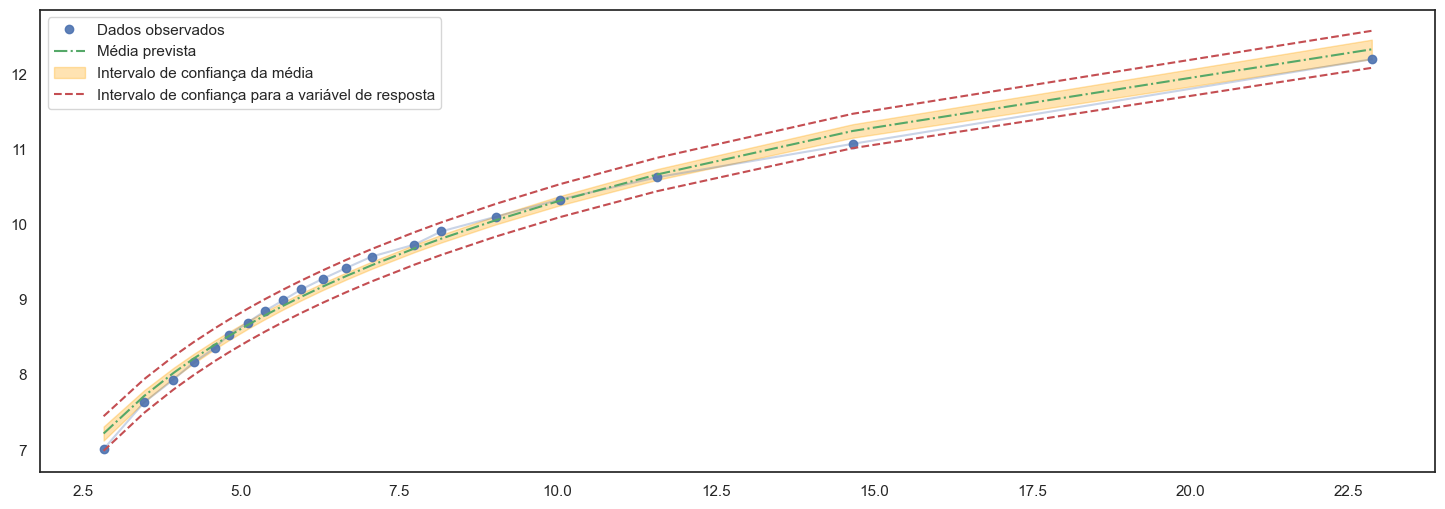

In [30]:
# Exibindo o gráfico com os resultados do modelo de regressão linear
plotar_resultados_regressao(df_modelo5)

---

### Regressão segmentada

In [31]:
# Definindo um ponto de corte
C1 = 7.5

# Criando as colunas X_1 e X_2 no DataFrame df_train2
df_train2['X_1'] = df_train2['tempo_emprego'].where(df_train2['tempo_emprego'] <= C1, C1)
df_train2['X_2'] = df_train2['tempo_emprego'].where(df_train2['tempo_emprego'] > C1, C1)

# Exibindo o DataFrame df_train2
df_train2

,tempo_emprego,renda_log,tempo_emprego_cat,X_1,X_2
0,2.828320,7.010163,"(-inf, 3.885]",2.828320,7.500000
1,3.468372,7.632577,"(-inf, 3.885]",3.468372,7.500000
2,3.931181,7.936228,"(3.885, 4.523]",3.931181,7.500000
3,4.253151,8.165258,"(3.885, 4.523]",4.253151,7.500000
4,4.589883,8.359802,"(4.523, 5.548]",4.589883,7.500000
5,4.807133,8.533222,"(4.523, 5.548]",4.807133,7.500000
6,5.104199,8.695236,"(4.523, 5.548]",5.104199,7.500000
7,5.371974,8.846803,"(4.523, 5.548]",5.371974,7.500000
8,5.665605,8.992746,"(5.548, 6.825]",5.665605,7.500000
9,5.951053,9.135799,"(5.548, 6.825]",5.951053,7.500000


In [32]:
# Ajustando um novo modelo de regressão linear (modelo6)
modelo6 = smf.ols(formula='renda_log ~ X_1 + X_2', data=df_train2).fit()

# Imprimindo o R-quadrado ajustado dos modelos
for i, modelo in enumerate([modelo1, modelo2, modelo3, modelo4, modelo5, modelo6], start=1):
    print(f'R-quadrado ajustado (modelo{i}): {modelo.rsquared_adj:.2%}')

# Exibindo um resumo do sexto modelo
modelo6.summary()

R-quadrado ajustado (modelo1): 41.74%
R-quadrado ajustado (modelo2): 47.57%
R-quadrado ajustado (modelo3): 84.98%
R-quadrado ajustado (modelo4): 87.72%
R-quadrado ajustado (modelo5): 99.34%
R-quadrado ajustado (modelo6): 99.04%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     983.0
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           2.70e-18
Time:                        23:21:11   Log-Likelihood:                 15.488
No. Observations:                  20   AIC:                            -24.98
Df Residuals:                      17   BIC:                            -21.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5931      0.112     41.190      0.000       4.358       4.828
X_1            0.5583      0.020     27.855      0.000       0.516       0.601
X_2            0.1517      0.008     18.154      0.000       0.134       0.169
==============================================================================
Omnibus:                        7.421   Durbin-Watson:                   0.583
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                5.062
Skew:                          -1.174   Prob(JB):                       0.0796
Kurtosis:                       3.747   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Combinando os resultados do modelo de regressão linear com as colunas relevantes do DataFrame
df_modelo6 = pd.concat([df_train2.iloc[:, [0, 1, 3, 4]], modelo6.get_prediction().summary_frame()], axis=1)

# Exibindo o DataFrame df_modelo6
df_modelo6

,tempo_emprego,renda_log,X_1,X_2,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.828320,7.010163,2.828320,7.500000,7.310198,0.063374,7.176490,7.443905,7.022045,7.598351
1,3.468372,7.632577,3.468372,7.500000,7.667555,0.052361,7.557082,7.778028,7.389421,7.945690
2,3.931181,7.936228,3.931181,7.500000,7.925953,0.045002,7.831008,8.020899,7.653613,8.198293
3,4.253151,8.165258,4.253151,7.500000,8.105717,0.040351,8.020585,8.190850,7.836641,8.374794
4,4.589883,8.359802,4.589883,7.500000,8.293723,0.036085,8.217591,8.369855,8.027358,8.560089
5,4.807133,8.533222,4.807133,7.500000,8.415020,0.033765,8.343782,8.486258,8.150011,8.680028
6,5.104199,8.695236,5.104199,7.500000,8.580879,0.031304,8.514834,8.646924,8.317219,8.844539
7,5.371974,8.846803,5.371974,7.500000,8.730384,0.029938,8.667220,8.793549,8.467431,8.993337
8,5.665605,8.992746,5.665605,7.500000,8.894326,0.029510,8.832066,8.956587,8.631589,9.157064
9,5.951053,9.135799,5.951053,7.500000,9.053699,0.030208,8.989966,9.117432,8.790609,9.316789


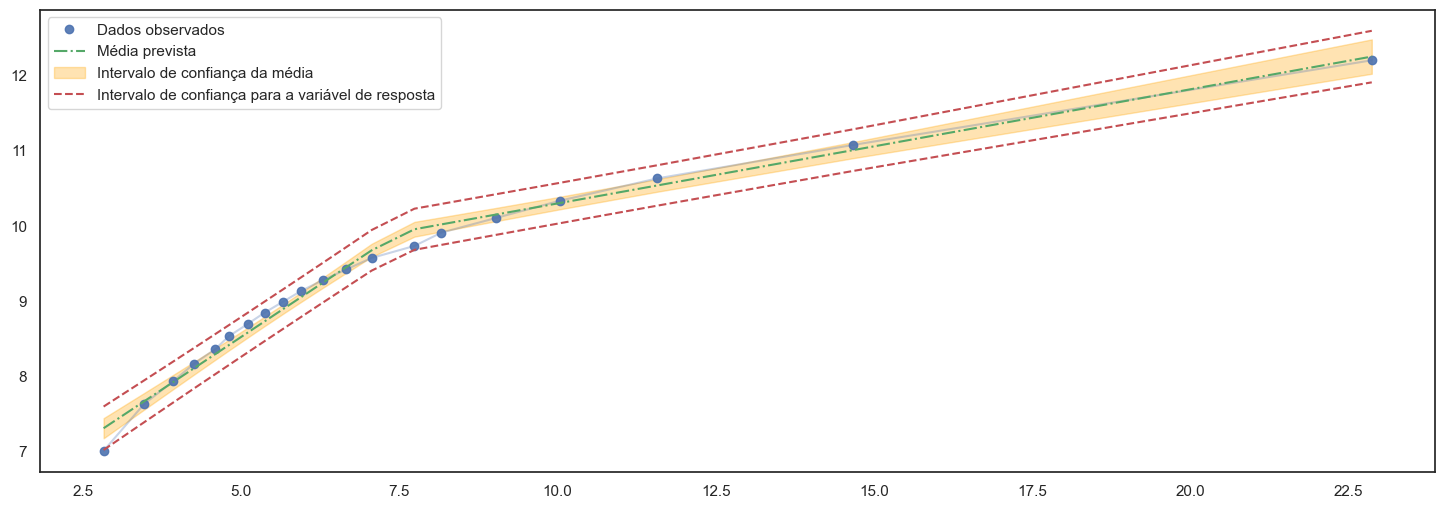

In [34]:
# Exibindo o gráfico com os resultados do modelo de regressão linear (modelo6)
plotar_resultados_regressao(df_modelo6)

---

### Lowess

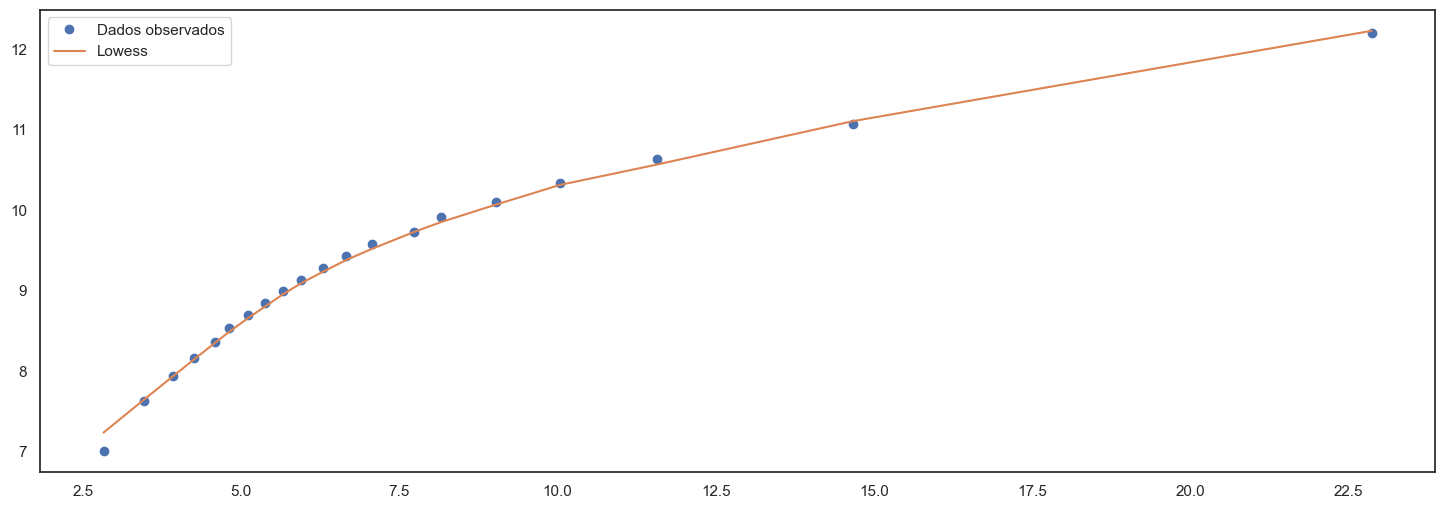

In [35]:
# Aplicando o método LOWESS para ajustar uma linha suave
lowess = sm.nonparametric.lowess(endog=df_train2['renda_log'], exog=df_train2['tempo_emprego'], frac=2/3)

# Criando o gráfico
plt.figure(figsize=(18, 6))
plt.plot(df_train2['tempo_emprego'], df_train2['renda_log'], 'o', label='Dados observados')
plt.plot(df_train2['tempo_emprego'], lowess[:, 1], label='Lowess')
plt.legend()
plt.show()

In [36]:
# Interpolando os valores suavizados gerados pelo método LOWESS
df_train2['lowess'] = interp1d(lowess[:, 0], lowess[:, 1], bounds_error=False)(df_train2['tempo_emprego'])

# Exibindo o DataFrame atualizado
df_train2


,tempo_emprego,renda_log,tempo_emprego_cat,X_1,X_2,lowess
0,2.828320,7.010163,"(-inf, 3.885]",2.828320,7.500000,7.237161
1,3.468372,7.632577,"(-inf, 3.885]",3.468372,7.500000,7.647177
2,3.931181,7.936228,"(3.885, 4.523]",3.931181,7.500000,7.940221
3,4.253151,8.165258,"(3.885, 4.523]",4.253151,7.500000,8.142330
4,4.589883,8.359802,"(4.523, 5.548]",4.589883,7.500000,8.351593
5,4.807133,8.533222,"(4.523, 5.548]",4.807133,7.500000,8.484623
6,5.104199,8.695236,"(4.523, 5.548]",5.104199,7.500000,8.654556
7,5.371974,8.846803,"(4.523, 5.548]",5.371974,7.500000,8.798389
8,5.665605,8.992746,"(5.548, 6.825]",5.665605,7.500000,8.955705
9,5.951053,9.135799,"(5.548, 6.825]",5.951053,7.500000,9.092455


In [37]:
# Ajustando um novo modelo de regressão linear com a variável 'lowess'
modelo7 = smf.ols(formula='renda_log ~ lowess', data=df_train2).fit()

# Imprimindo os R-quadrados ajustados dos modelos
modelos = [modelo1, modelo2, modelo3, modelo4, modelo5, modelo6, modelo7]
for i, modelo in enumerate(modelos, start=1):
    print(f'R-quadrado ajustado (modelo{i}): {modelo.rsquared_adj:.2%}')

# Exibindo o resumo do sétimo modelo
modelo7.summary()


R-quadrado ajustado (modelo1): 41.74%
R-quadrado ajustado (modelo2): 47.57%
R-quadrado ajustado (modelo3): 84.98%
R-quadrado ajustado (modelo4): 87.72%
R-quadrado ajustado (modelo5): 99.34%
R-quadrado ajustado (modelo6): 99.04%
R-quadrado ajustado (modelo7): 99.75%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     7457.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           5.06e-25
Time:                        23:21:12   Log-Likelihood:                 28.186
No. Observations:                  20   AIC:                            -52.37
Df Residuals:                      18   BIC:                            -50.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1228      0.110     -1.119      0.278      -0.353       0.108
lowess         1.0148      0.012     86.352      0.000       0.990       1.039
==============================================================================
Omnibus:                       27.279   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.962
Skew:                          -2.382   Prob(JB):                     2.84e-10
Kurtosis:                       8.482   Cond. No.                         74.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Combinando os resultados do modelo7 com as colunas relevantes do DataFrame df_train2
df_modelo7 = pd.concat([df_train2[['tempo_emprego', 'renda_log', 'lowess']], modelo7.get_prediction().summary_frame()], axis=1)

# Exibindo o DataFrame df_modelo7
df_modelo7


,tempo_emprego,renda_log,lowess,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.828320,7.010163,7.237161,7.221198,0.027599,7.163214,7.279182,7.078012,7.364383
1,3.468372,7.632577,7.647177,7.637265,0.023566,7.587754,7.686775,7.497296,7.777233
2,3.931181,7.936228,7.940221,7.934634,0.020888,7.890749,7.978519,7.796555,8.072713
3,4.253151,8.165258,8.142330,8.139726,0.019184,8.099421,8.180031,8.002743,8.276709
4,4.589883,8.359802,8.351593,8.352077,0.017585,8.315132,8.389022,8.216045,8.488110
5,4.807133,8.533222,8.484623,8.487071,0.016678,8.452033,8.522109,8.351544,8.622598
6,5.104199,8.695236,8.654556,8.659512,0.015669,8.626592,8.692432,8.524517,8.794507
7,5.371974,8.846803,8.798389,8.805467,0.014972,8.774013,8.836922,8.670822,8.940112
8,5.665605,8.992746,8.955705,8.965106,0.014399,8.934856,8.995357,8.830737,9.099475
9,5.951053,9.135799,9.092455,9.103874,0.014080,9.074293,9.133454,8.969654,9.238093


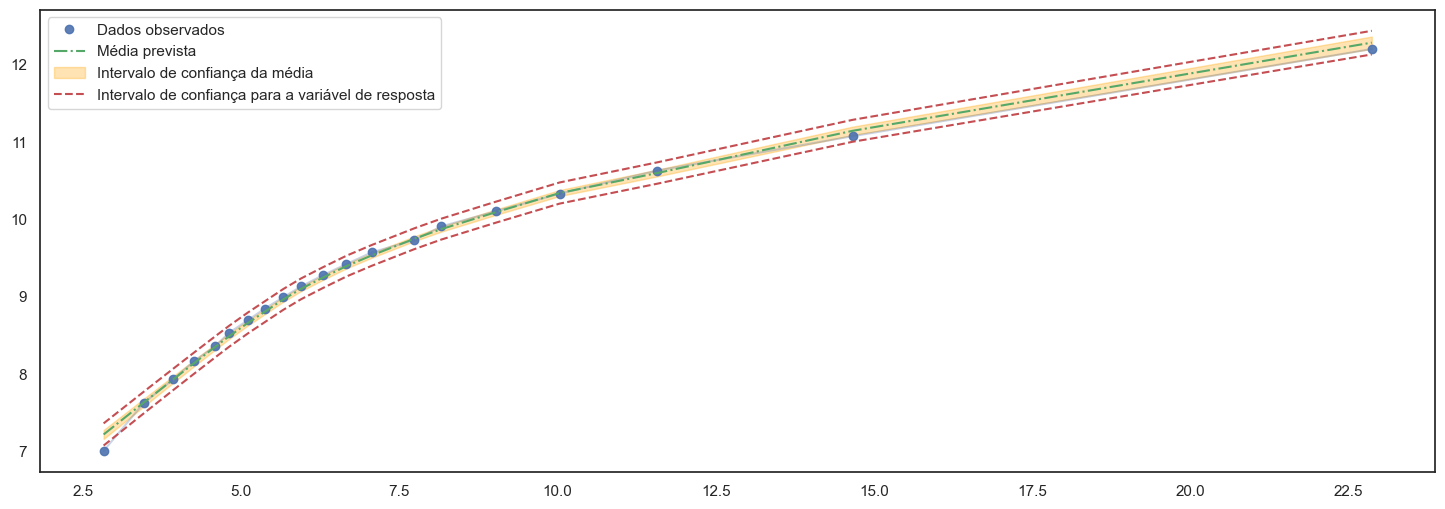

In [39]:
# Exibindo o gráfico com os resultados do modelo7
plotar_resultados_regressao(df_modelo7)


---

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

> Nova Base Reduzida.

In [40]:
# Criando o DataFrame df_ que agrupa os dados por intervalos de renda e calcula a média do tempo de emprego e do logaritmo da renda
df_ = (df_train
       .groupby(['data_ref', pd.cut(df_train.renda, bins=retbins)])  # Agrupando por data_ref e intervalos de renda
       .agg(tempo_emprego=('tempo_emprego_fillna_2', 'mean'), renda_log=('renda_log', 'mean'))  # Calculando a média
       .reset_index(level='renda', drop=True)  # Removendo o índice 'renda'
       .rename(columns={'tempo_emprego_fillna_2':'tempo_emprego'})  # Renomeando a coluna tempo_emprego_fillna_2
)

# Exibindo o DataFrame df_
df_


/var/folders/30/ccp86mqj2q1cbkdw53t09hmc0000gn/T/ipykernel_3846/846581590.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['data_ref', pd.cut(df_train.renda, bins=retbins)])  # Agrupando por data_ref e intervalos de renda


,tempo_emprego,renda_log
data_ref,,
2015-01-01,3.165641,6.945560
2015-01-01,4.140064,7.624840
2015-01-01,4.928556,7.930471
2015-01-01,5.392311,8.163630
2015-01-01,5.995652,8.359317
...,...,...
2015-12-01,13.418210,10.096354
2015-12-01,16.156079,10.331155
2015-12-01,18.939010,10.623817


In [41]:
# Dividindo o DataFrame df_ em conjuntos de treinamento e teste com base em datas
max_date = df_.index.unique().max() - pd.DateOffset(months=3)
df_train_ = df_[df_.index <= max_date].copy()  # Conjunto de treinamento
df_test_ = df_[df_.index > max_date].copy()  # Conjunto de teste

# Imprimindo informações sobre o tamanho e as datas dos conjuntos de treinamento e teste
print(f'''
Base de treino: {df_train_.shape} - {df_train_.index.unique().strftime('%b %y').values}
Base de teste: {df_test_.shape} - {df_test_.index.unique().strftime('%b %y').values}
''')



Base de treino: (180, 2) - ['Jan 15' 'Feb 15' 'Mar 15' 'Apr 15' 'May 15' 'Jun 15' 'Jul 15' 'Aug 15'
 'Sep 15']
Base de teste: (60, 2) - ['Oct 15' 'Nov 15' 'Dec 15']



---

#### Categorização

CATEGORIZAÇÃO
R-quadrado ajustado do modelo: 72.12%
R-quadrado com dados de teste: 75.50%



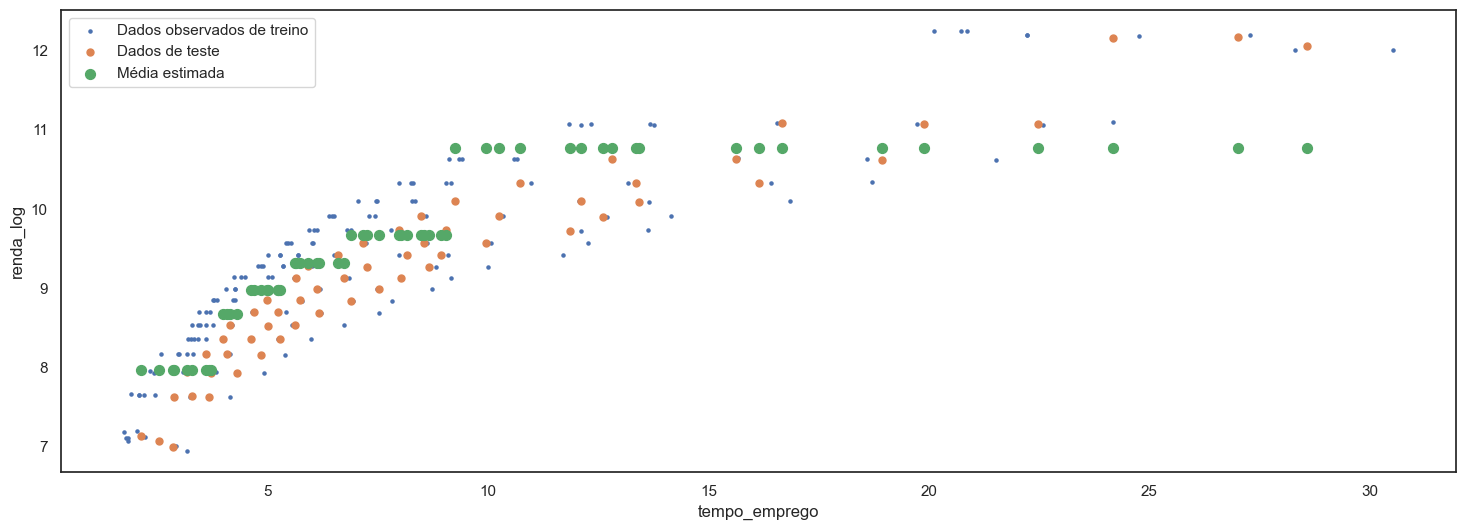

In [42]:
# Categorizando a variável 'tempo_emprego' nos conjuntos de treinamento e teste
for df in [df_train_, df_test_]:
    df['tempo_emprego_cat'] = pd.cut(x=df.tempo_emprego, bins=q)

# Ajustando um modelo de regressão linear
cat_model = smf.ols(formula='renda_log ~ tempo_emprego_cat', data=df_train_).fit()

# Imprimindo o R-quadrado ajustado e o R-quadrado nos dados de teste
r2_test = r2_score(y_true=df_test_.renda_log, y_pred=cat_model.predict(df_test_))
print(f'''CATEGORIZAÇÃO
R-quadrado ajustado do modelo: {cat_model.rsquared_adj:.2%}
R-quadrado com dados de teste: {r2_test:.2%}
''')

# Função para plotar resultados do modelo
def plotar_resultados_teste(modelo):
    plt.figure(figsize=(18,6))
    plt.scatter(df_train_.tempo_emprego, df_train_.renda_log, s=5, label='Dados observados de treino')
    plt.scatter(df_test_.tempo_emprego, df_test_.renda_log, s=25, label='Dados de teste')
    plt.scatter(df_test_.tempo_emprego, modelo.predict(df_test_), s=50, label='Média estimada')
    plt.xlabel('tempo_emprego')
    plt.ylabel('renda_log')
    plt.legend(loc=2)
    plt.show()

# Exibindo o gráfico dos resultados
plotar_resultados_teste(cat_model)



---

#### Transformação sobre X.

TRANSFORMAÇÃO SOBRE X
R-quadrado ajustado do modelo: 83.14%
R-quadrado com dados de teste: 87.26%



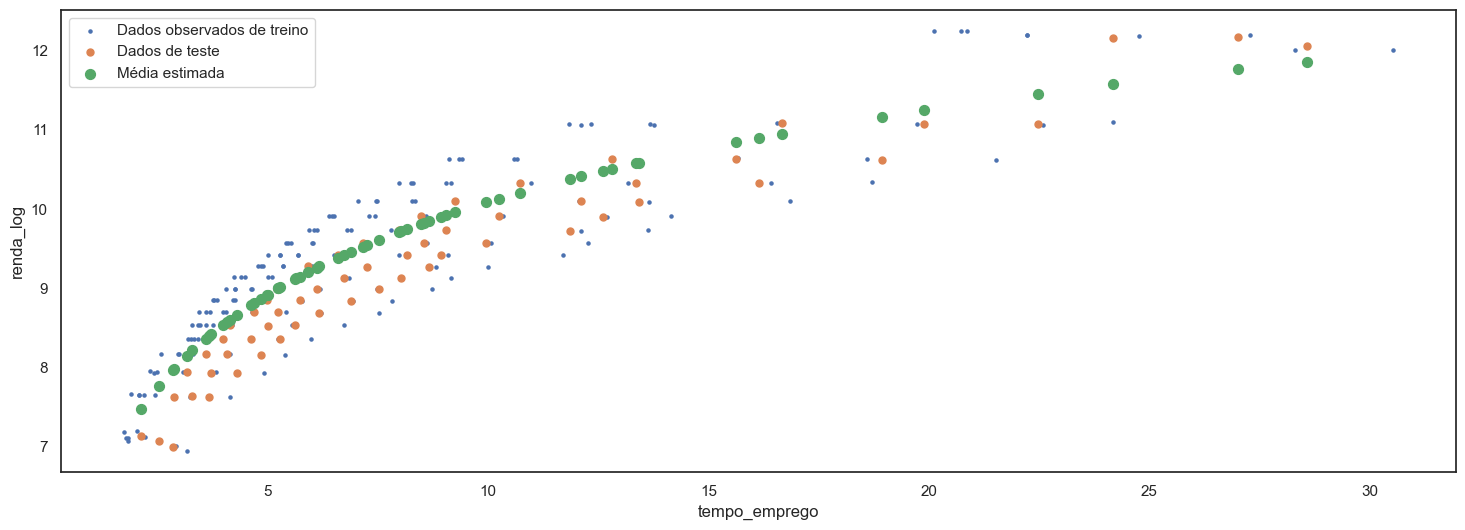

In [43]:
# Ajustando um modelo de regressão linear com a variável 'tempo_emprego' transformada
transform_model = smf.ols(formula='renda_log ~ I(np.log(tempo_emprego))', data=df_train_).fit()

# Calculando R-quadrados ajustado e estimado nos dados de teste
r2 = r2_score(df_test_.renda_log, transform_model.predict(df_test_))
print(f'''TRANSFORMAÇÃO SOBRE X
R-quadrado ajustado do modelo: {transform_model.rsquared_adj:.2%}
R-quadrado com dados de teste: {r2:.2%}
''')

# Exibindo o gráfico dos resultados
plotar_resultados_teste(transform_model)


---

#### Regressão segmentada.

REGRESSÃO SEGMENTADA
R-quadrado ajustado do modelo: 82.38%
R-quadrado com dados de teste: 87.92%



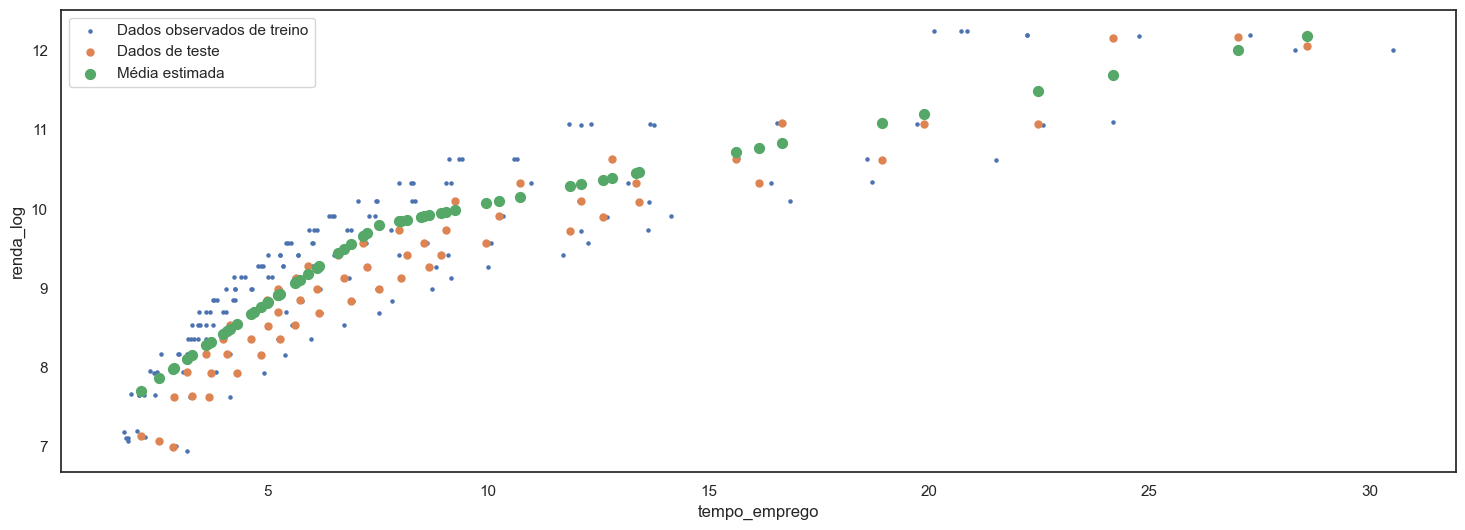

In [44]:
# Definindo o ponto de corte
C1 = 7.5

# Segmentando 'tempo_emprego' e criando 'X_1' e 'X_2' para os conjuntos de treinamento e teste
for df in [df_train_, df_test_]:
    df['X_1'] = df['tempo_emprego'].where(df['tempo_emprego'] <= C1, C1)
    df['X_2'] = df['tempo_emprego'].where(df['tempo_emprego'] > C1, C1)

# Ajustando o modelo de regressão linear
segmented_model = smf.ols(formula='renda_log ~ X_1 + X_2', data=df_train_).fit()

# Calculando e exibindo os R-quadrados ajustados
r2 = r2_score(df_test_.renda_log, segmented_model.predict(df_test_))
print(f'''REGRESSÃO SEGMENTADA
R-quadrado ajustado do modelo: {segmented_model.rsquared_adj:.2%}
R-quadrado com dados de teste: {r2:.2%}
''')

# Exibindo o gráfico dos resultados
plotar_resultados_teste(segmented_model)


---

#### Lowess

LOWESS
R-quadrado ajustado do modelo: 83.40%
R-quadrado com dados de teste: 88.26%



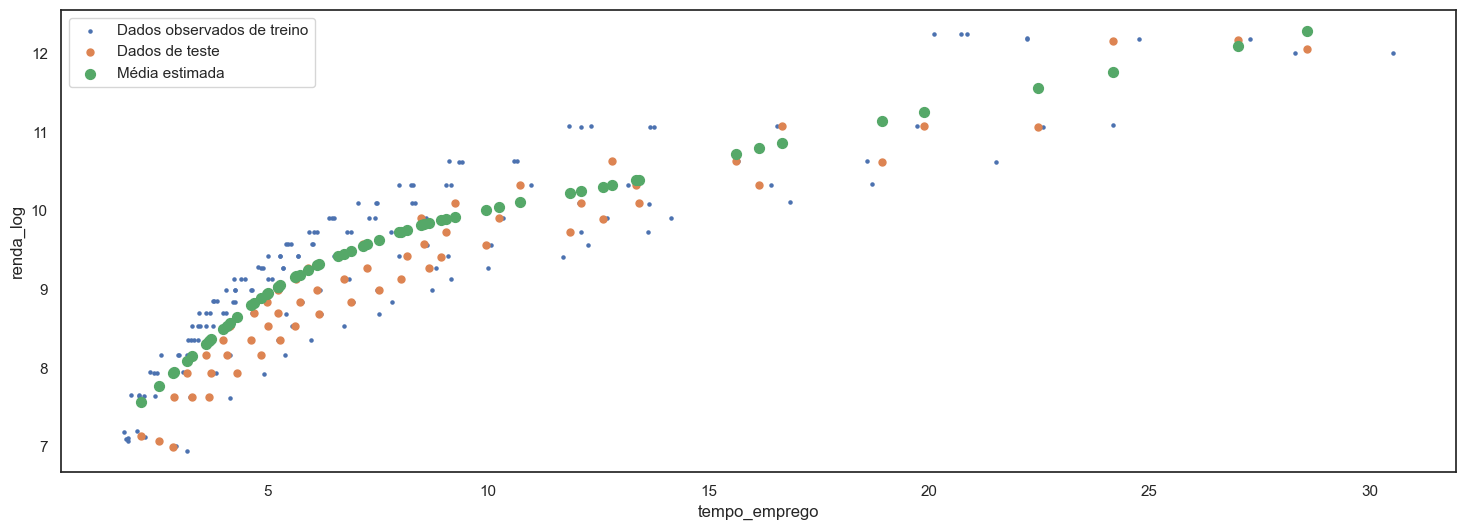

In [45]:
# Calculando LOWESS e interpolando os valores suavizados
lowess_ = sm.nonparametric.lowess(endog=df_train_.renda_log, exog=df_train_.tempo_emprego, frac=2/3)
f_ = interp1d(lowess_[:, 0], lowess_[:, 1], bounds_error=False)

# Adicionando a coluna 'lowess' nos conjuntos de treinamento e teste
for df in [df_train_, df_test_]:
    df['lowess'] = f_(df.tempo_emprego)

# Ajustando o modelo de regressão linear
lowess_model = smf.ols(formula='renda_log ~ lowess', data=df_train_).fit()

# Calculando e exibindo os R-quadrados ajustados
r2 = r2_score(df_test_.renda_log, lowess_model.predict(df_test_))
print(f'''LOWESS
R-quadrado ajustado do modelo: {lowess_model.rsquared_adj:.2%}
R-quadrado com dados de teste: {r2:.2%}
''')

# Exibindo o gráfico dos resultados
plotar_resultados_teste(lowess_model)
